# Installing and importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd

from pathlib import Path
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Data

## Defining relevant paths

In [2]:
data_dir_path = Path("../data/raw")
songs_data_path = data_dir_path / "Music_Info.csv"
users_data_path = data_dir_path / "User_Listening_History.csv"

## Viewing the data

In [3]:
# songs_data

songs_df = pd.read_csv(songs_data_path, usecols=["track_id","name","artist","spotify_preview_url"])
songs_df

,track_id,name,artist,spotify_preview_url
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...
...,...,...,...,...
50678,TRQYCFV128F9322F50,Ryusei Rocket,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/d2668a5a3e0b1fda...
50679,TRHQCSH128F42724B7,Colors Of The Wind,ACIDMAN,https://p.scdn.co/mp3-preview/8e22a7052ef3ecf7...
50680,TRZRODK128F92D68D7,The Revelation,coldrain,https://p.scdn.co/mp3-preview/4b51a813f67e3853...
50681,TRGLMEM128F9322F63,Koi no Dependence,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/5a61e031df174666...


In [4]:
df = dd.read_csv(users_data_path)
df.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [5]:
df

,track_id,user_id,playcount
npartitions=9,,,
,string,string,int64
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [6]:
df.npartitions

9

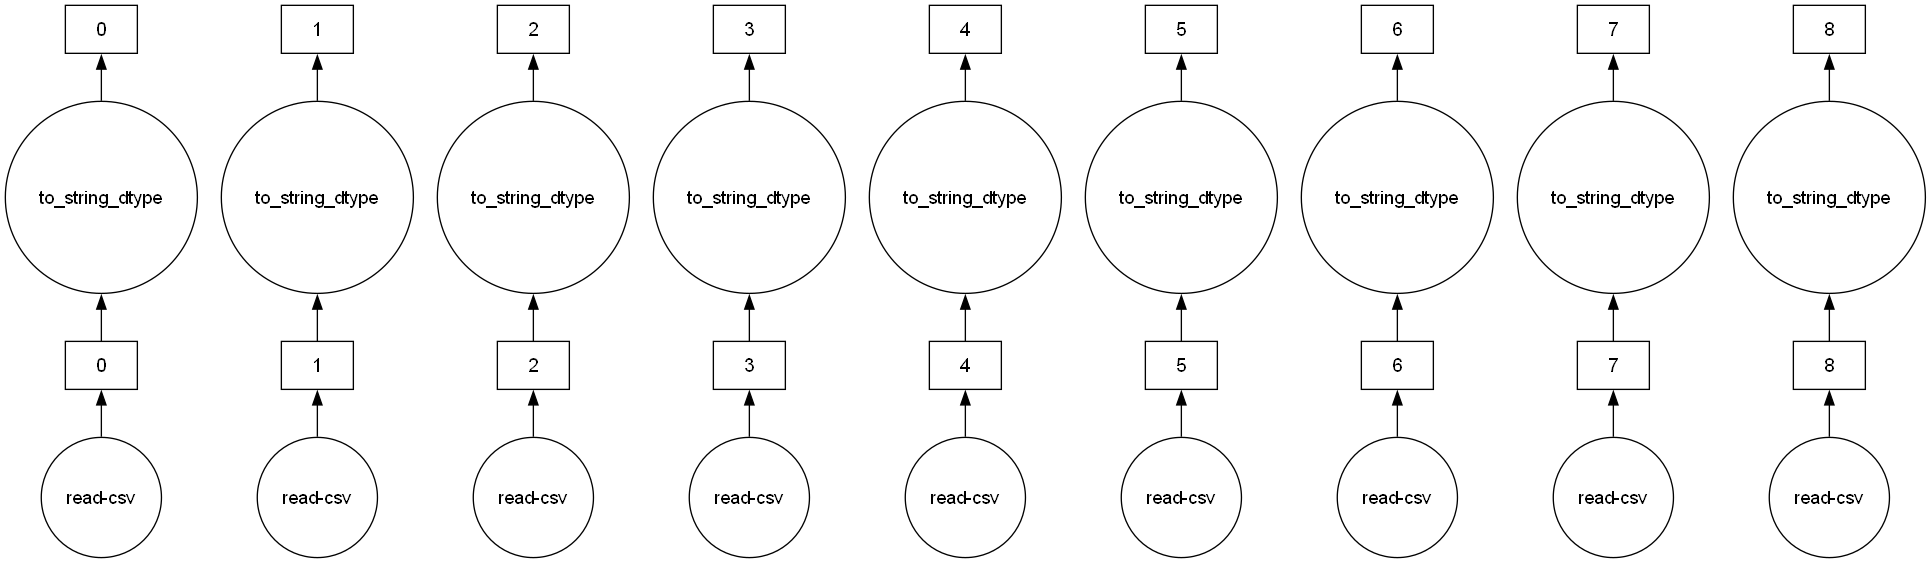

In [7]:
df.visualize(tasks=True, filename=None)

# Exploration

In [8]:
# Number of unique tracks in the data

nunique_tracks = df.loc[:, "track_id"].nunique()

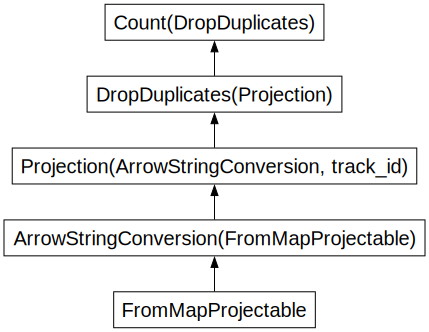

In [9]:
nunique_tracks.visualize(filename=None)

In [10]:
nunique_tracks = nunique_tracks.compute()
nunique_tracks

np.int64(30459)

In [11]:
# List of unique track id's

unique_track_ids = df.loc[:, "track_id"].unique().compute()
unique_track_ids = unique_track_ids.to_list()
len(unique_track_ids)

30459

In [12]:
# Number of unique users

nunique_users = df.loc[:, "user_id"].nunique()
nunique_users = nunique_users.compute()
nunique_users

np.int64(962037)

In [13]:
# Filtered songs

filtered_songs = songs_df[songs_df["track_id"].isin(unique_track_ids)]
filtered_songs.reset_index(drop=True, inplace=True)
filtered_songs

,track_id,name,artist,spotify_preview_url
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...
2,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...
3,TRXOGZT128F424AD74,Karma Police,Radiohead,https://p.scdn.co/mp3-preview/5a09f5390e2862af...
4,TRUJIIV12903CA8848,Clocks,Coldplay,https://p.scdn.co/mp3-preview/24c7fe858b234e3c...
...,...,...,...,...
30454,TRXWSIN128F9339A11,Infinite Love Song,Maximilian Hecker,https://p.scdn.co/mp3-preview/8b3d529025fe3c60...
30455,TRPIGDW12903CDEB2D,Slip of the Lip,Fact,https://p.scdn.co/mp3-preview/cf64490291f9a600...
30456,TRQYCFV128F9322F50,Ryusei Rocket,アンティック-珈琲店-,https://p.scdn.co/mp3-preview/d2668a5a3e0b1fda...
30457,TRHQCSH128F42724B7,Colors Of The Wind,ACIDMAN,https://p.scdn.co/mp3-preview/8e22a7052ef3ecf7...


In [14]:
filtered_songs[filtered_songs["name"] == "Crazy in Love"]

,track_id,name,artist,spotify_preview_url
3337,TROINZB128F932F740,Crazy in Love,Beyoncé,https://p.scdn.co/mp3-preview/807828ea7070bda7...


# Creating the interaction matrix

In [15]:
# Load data with dask

df = dd.read_csv(users_data_path)

In [16]:
# Ensure `playcount` is numeric

df["playcount"] = df["playcount"].astype(np.float64)

In [17]:
# Convert `user_id` and `track_id` to numeric indices

df = df.categorize(columns=["user_id", "track_id"])

user_mapping = df["user_id"].cat.codes
track_mapping = df["track_id"].cat.codes

In [18]:
df = df.assign(
    user_idx = user_mapping,
    track_idx = track_mapping,
)

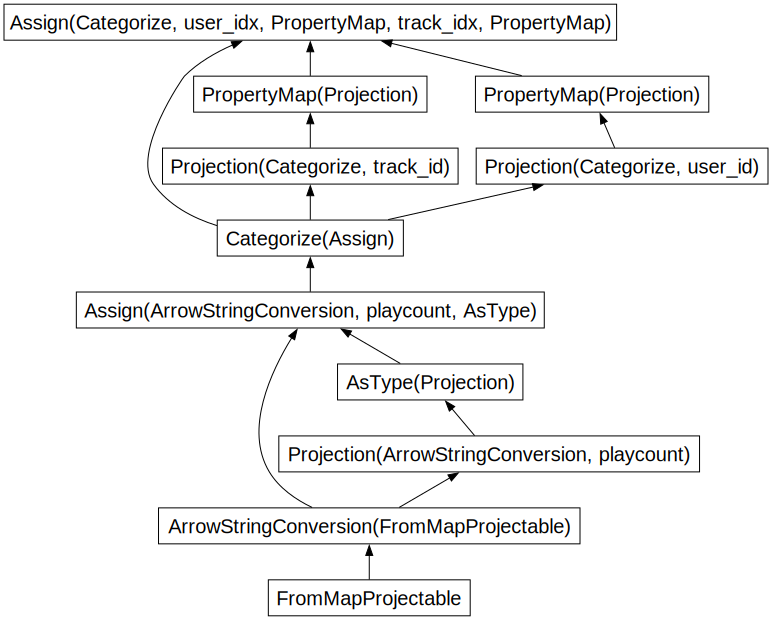

In [19]:
df.visualize(filename=None)

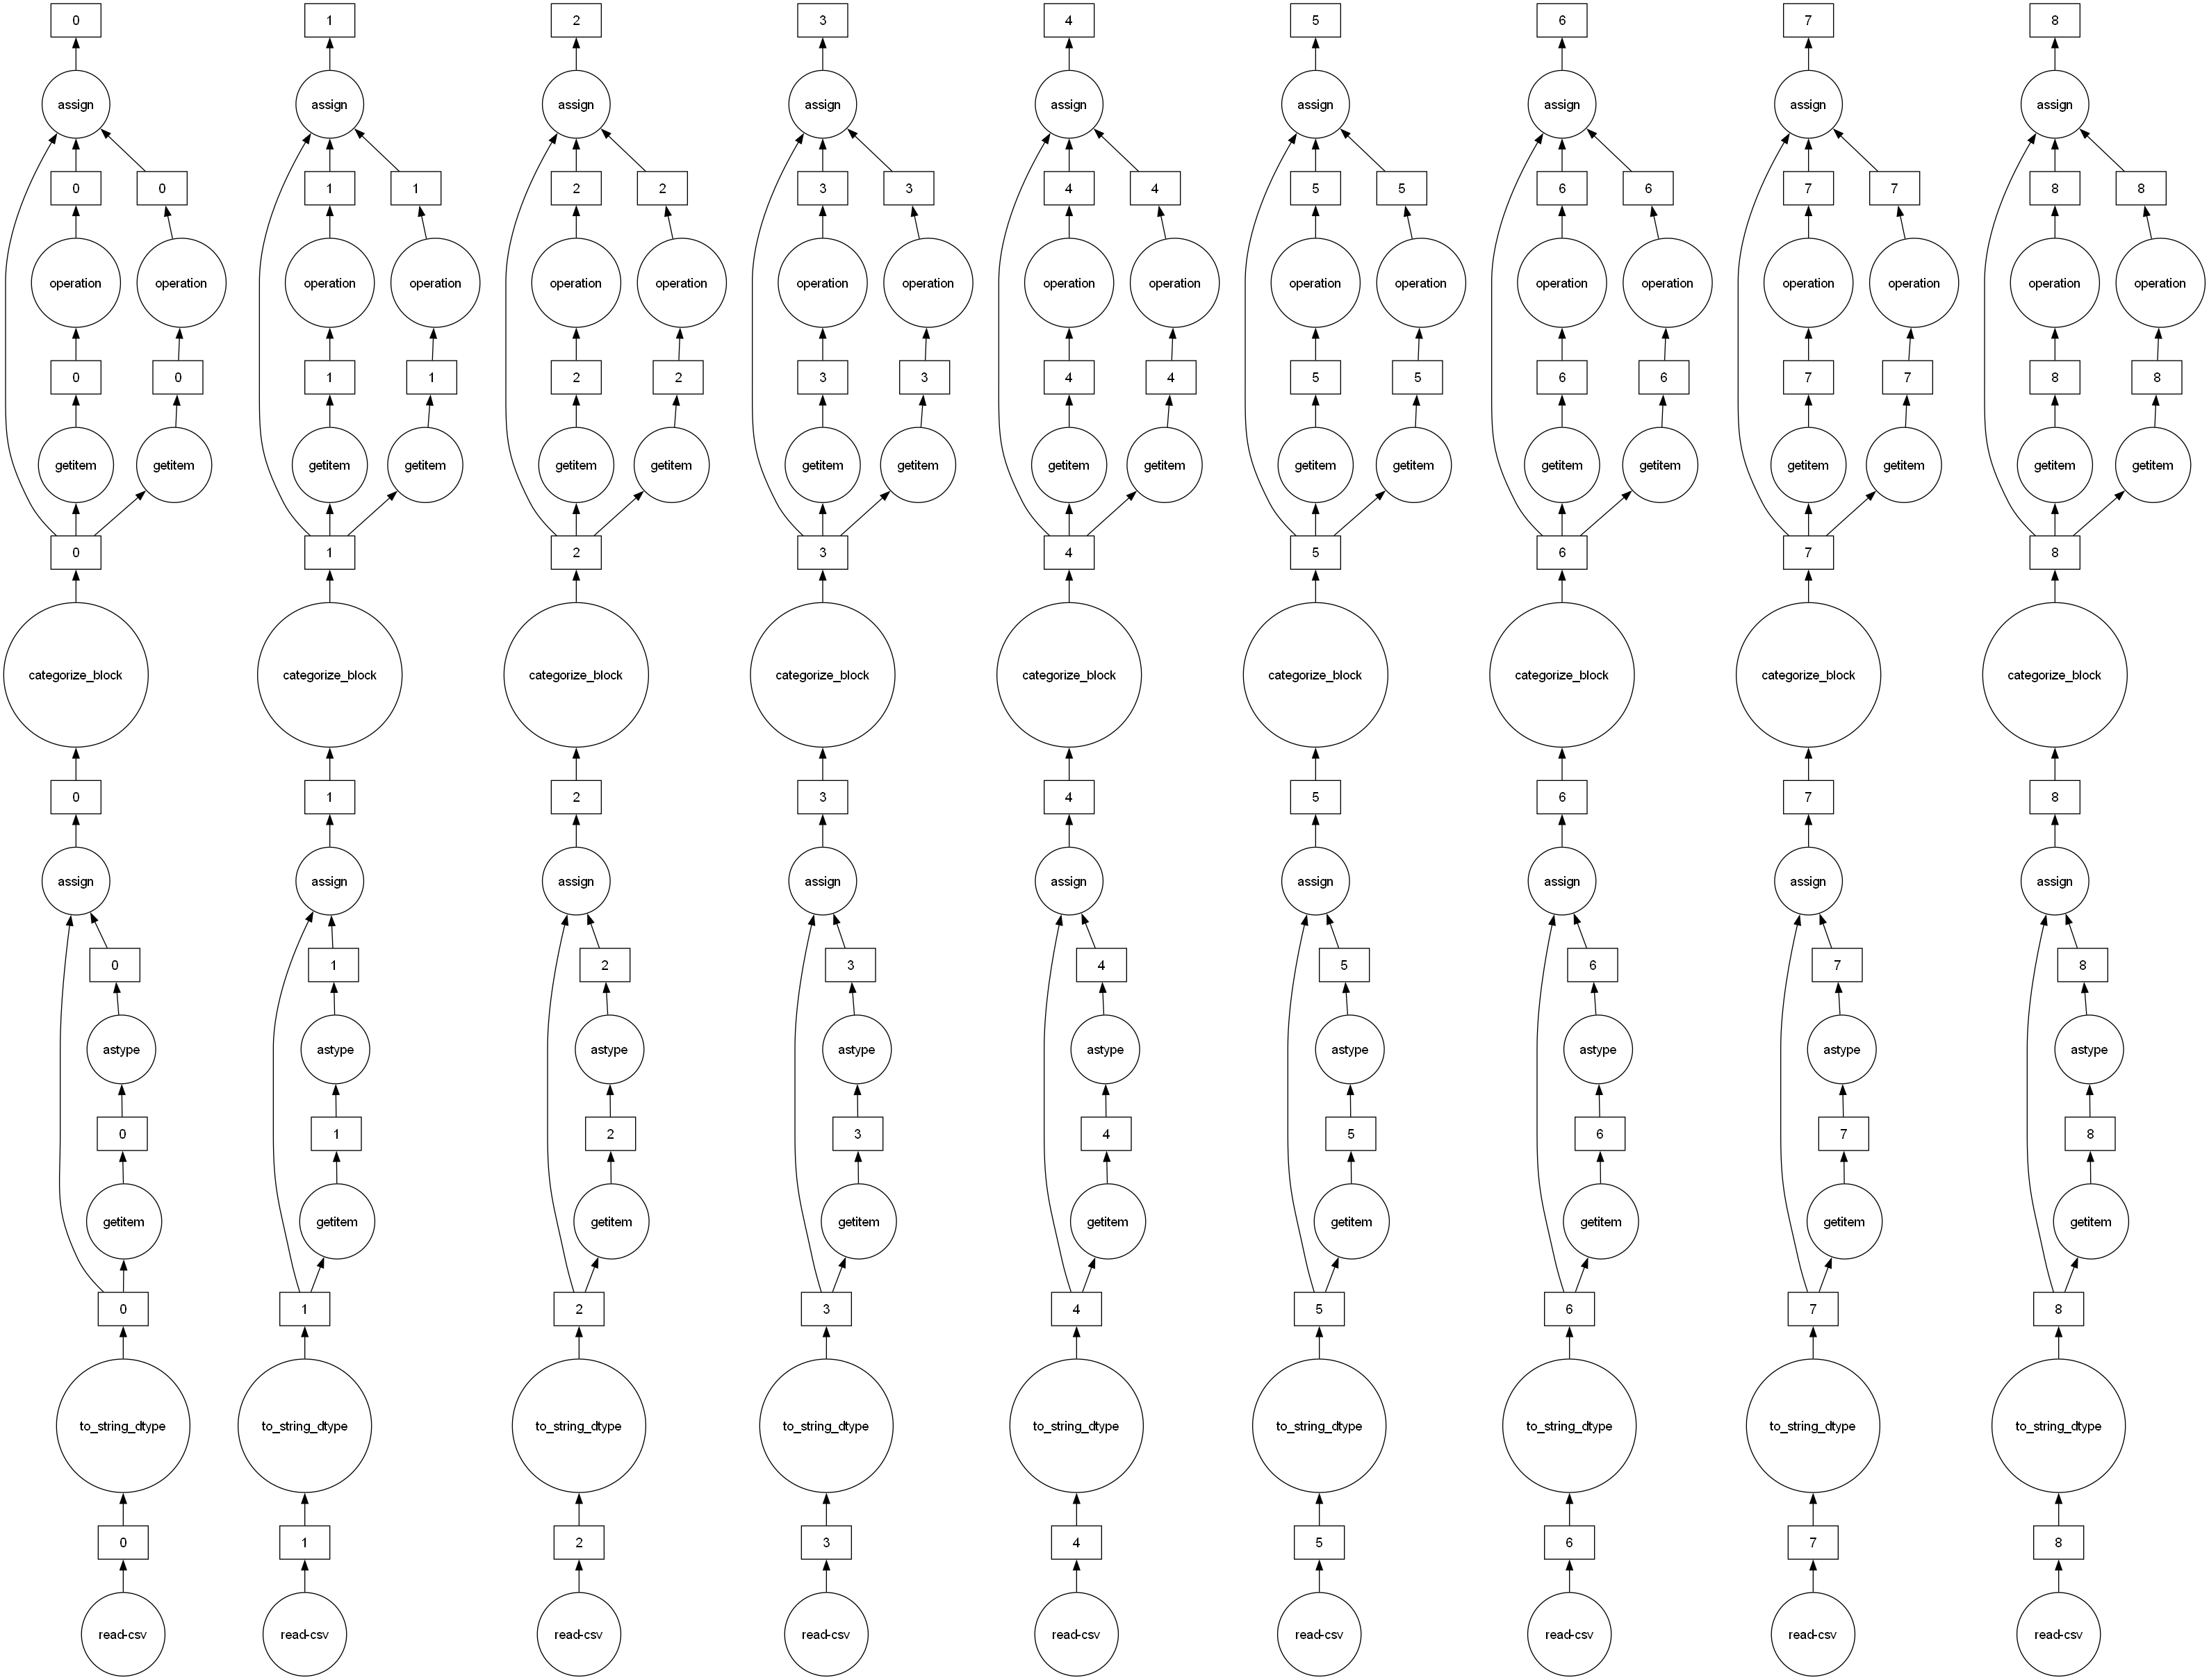

In [20]:
df.visualize(tasks=True, filename=None)

In [21]:
df

,track_id,user_id,playcount,user_idx,track_idx
npartitions=9,,,,,
,category[known],category[known],float64,int32,int16
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [22]:
# Compute the interaction matrix

interaction_array = df.groupby(["track_idx", "user_idx"])["playcount"].sum().reset_index()

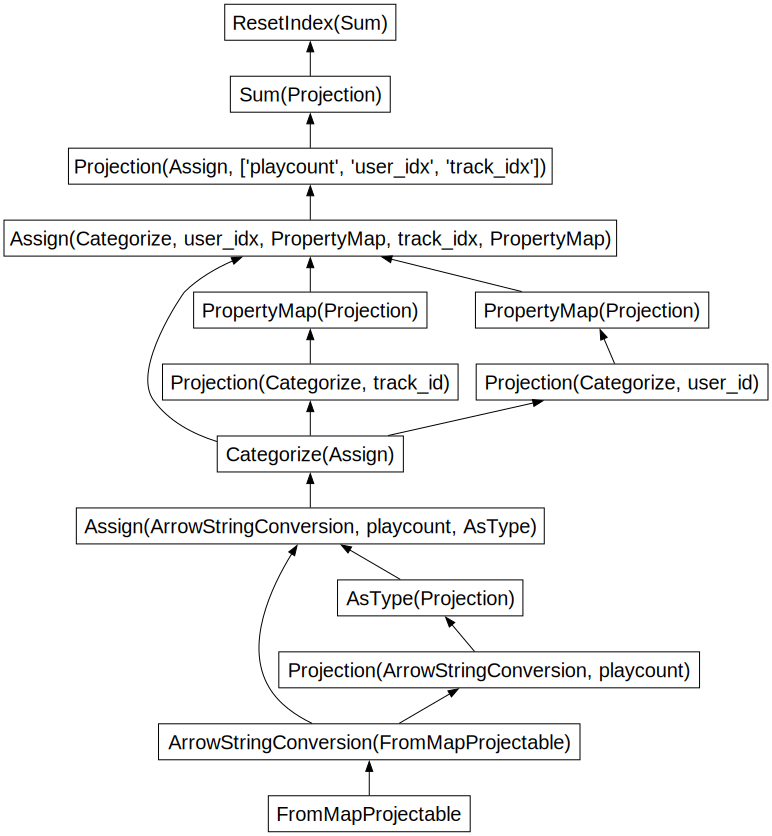

In [23]:
interaction_array.visualize(filename=None)

In [24]:
# interaction_array.visualize(tasks=True, filename=None)

In [25]:
interaction_array

,track_idx,user_idx,playcount
npartitions=1,,,
,int16,int32,float64
,...,...,...


In [26]:
interaction_array = interaction_array.compute()

In [27]:
interaction_array

,track_idx,user_idx,playcount
0,0,15780,3.0
1,0,76968,1.0
2,0,134525,2.0
3,0,231541,1.0
4,0,305348,1.0
...,...,...,...
9711296,30458,902360,1.0
9711297,30458,913310,1.0
9711298,30458,922319,1.0
9711299,30458,925779,1.0


In [28]:
# Create the sparse matrix

row_indices = interaction_array['track_idx']
col_indices = interaction_array['user_idx']
values = interaction_array['playcount']

In [29]:
row_indices.nunique()

30459

In [30]:
n_tracks = nunique_tracks
n_users = nunique_users

sparse_matrix = csr_matrix((values, (row_indices, col_indices)), shape=(n_tracks, n_users))

print("Sparse matrix shape:", sparse_matrix.shape)
print("Non-zero elements:", sparse_matrix.nnz)

Sparse matrix shape: (30459, 962037)
Non-zero elements: 9711301


In [31]:
sparse_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9711301 stored elements and shape (30459, 962037)>

In [32]:
pct_nonzero_elements = (sparse_matrix.nnz / (sparse_matrix.shape[0] * sparse_matrix.shape[1]))*100
print(f"There are about {pct_nonzero_elements:.3f}% non-zero elements in the sparse matrix.")

There are about 0.033% non-zero elements in the sparse matrix.


# Finding similarity

In [33]:
# One particular song index

np.where(df['track_id'].cat.categories == "TROINZB128F932F740")

(array([17018]),)

In [34]:
index = np.where(df['track_id'].cat.categories == "TROINZB128F932F740")[0][0]
index

np.int64(17018)

In [35]:
input_array = sparse_matrix[index]
input_array

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 610 stored elements and shape (1, 962037)>

In [36]:
similarity_scores = cosine_similarity(input_array, sparse_matrix)
similarity_scores

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.20943546e-05]], shape=(1, 30459))

In [37]:
similarity_scores.shape

(1, 30459)

In [38]:
# Top-k similarity scores

k = 10
np.sort(similarity_scores)

array([[0.        , 0.        , 0.        , ..., 0.07217127, 0.08225488,
        1.        ]], shape=(1, 30459))

In [39]:
np.sort(similarity_scores).ravel()

array([0.        , 0.        , 0.        , ..., 0.07217127, 0.08225488,
       1.        ], shape=(30459,))

In [40]:
np.sort(similarity_scores).ravel()[-k:]

array([0.03194337, 0.03860727, 0.0403116 , 0.04071357, 0.05404559,
       0.05529279, 0.05592032, 0.07217127, 0.08225488, 1.        ])

In [41]:
np.sort(similarity_scores).ravel()[-k:][::-1]

array([1.        , 0.08225488, 0.07217127, 0.05592032, 0.05529279,
       0.05404559, 0.04071357, 0.0403116 , 0.03860727, 0.03194337])

In [42]:
# Indices of the top-k similar songs

np.argsort(similarity_scores.ravel())[-k:][::-1]

array([17018, 24529, 28964,  3620,  9470,  7882,  2356,  3673, 17696,
        3187])

In [43]:
recommendations = df["track_id"].cat.categories[np.argsort(similarity_scores.ravel())[-k:][::-1]]
recommendations

Index(['TROINZB128F932F740', 'TRURCEI12903CA4395', 'TRYLWIW12903CA438D',
       'TRCVMAF12903D00E61', 'TRHRNEE12903CFDBD4', 'TRGEUXY128F4226B26',
       'TRBUXYH12903CC5A9D', 'TRCWEHF128F933FEBF', 'TRORYGR128F4272118',
       'TRCQMPL128E07819F0'],
      dtype='string', name='track_id')

In [44]:
filtered_songs[filtered_songs["name"] == "Crazy in Love"]

,track_id,name,artist,spotify_preview_url
3337,TROINZB128F932F740,Crazy in Love,Beyoncé,https://p.scdn.co/mp3-preview/807828ea7070bda7...


In [45]:
filtered_songs[filtered_songs["track_id"].isin(recommendations)]

,track_id,name,artist,spotify_preview_url
705,TRORYGR128F4272118,Situations,Jack Johnson,https://p.scdn.co/mp3-preview/813c020ee66f7ebc...
3214,TRCQMPL128E07819F0,I Can't Wait,The White Stripes,https://p.scdn.co/mp3-preview/bf4f920f8f79dfe1...
3337,TROINZB128F932F740,Crazy in Love,Beyoncé,https://p.scdn.co/mp3-preview/807828ea7070bda7...
8871,TRCVMAF12903D00E61,Delirium,Satyricon,https://p.scdn.co/mp3-preview/d039120c4f5f1e8d...
17287,TRGEUXY128F4226B26,Monday Massacre,Mr. Oizo,https://p.scdn.co/mp3-preview/4d6dbacc93e3ef7e...
18445,TRCWEHF128F933FEBF,Quiet Little Voices,We Were Promised Jetpacks,https://p.scdn.co/mp3-preview/8461f42d1254751e...
21872,TRBUXYH12903CC5A9D,Acoustic Funeral (For Love In Limbo),Him,https://p.scdn.co/mp3-preview/d1f4ee7269b8e667...
26611,TRYLWIW12903CA438D,Dreadlock,Future Prophecies,https://p.scdn.co/mp3-preview/13ca5435549b0e46...
26701,TRURCEI12903CA4395,Bring the Noise,Future Prophecies,https://p.scdn.co/mp3-preview/d558b155fb9dcfe4...
27774,TRHRNEE12903CFDBD4,Lunar Sea,Camel,https://p.scdn.co/mp3-preview/8bf35f13a0ece173...


In [46]:
def recommend(song_name, user_data, songs_data, interaction_matrix, k=6):
    # Fetch the song row
    song_row = songs_data[songs_data["name"] == song_name]
    print(song_row)

    # Track ID of the input song
    input_track_id = song_row["track_id"].values.item()
    print(input_track_id)

    # Index of track ID
    index = np.where(user_data["track_id"].cat.categories == input_track_id)[0].item()
    print(index)

    # Fetch the input vector
    input_array = interaction_matrix[index]

    # Get similarity scores
    similarity_scores = cosine_similarity(input_array, interaction_matrix)

    # Get top k recommendations
    recommended_track_ids = df["track_id"].cat.categories[np.argsort(similarity_scores.ravel())[-k-1:][::-1]]
    print(recommended_track_ids)

    # Get top scores
    top_scores = np.sort(similarity_scores.ravel())[-k-1:][::-1]
    print(top_scores)

    # Get the songs from the data and print
    temp_df = pd.DataFrame({
        "track_id": recommended_track_ids.tolist(),
        "score": top_scores
    })
    print(temp_df)
    
    top_k_songs = (
        songs_data
            .loc[songs_data["track_id"].isin(recommended_track_ids)]
            .merge(temp_df,on="track_id")
            .sort_values(by="score",ascending=False)
            .drop(columns=["track_id","score"])
            .reset_index(drop=True)
    )
    return top_k_songs

In [47]:
recommend(
    song_name="Crazy in Love",
    user_data=df,
    songs_data=filtered_songs,
    interaction_matrix=sparse_matrix
)

                track_id           name   artist  \
3337  TROINZB128F932F740  Crazy in Love  Beyoncé   

                                    spotify_preview_url  
3337  https://p.scdn.co/mp3-preview/807828ea7070bda7...  
TROINZB128F932F740
17018
Index(['TROINZB128F932F740', 'TRURCEI12903CA4395', 'TRYLWIW12903CA438D',
       'TRCVMAF12903D00E61', 'TRHRNEE12903CFDBD4', 'TRGEUXY128F4226B26',
       'TRBUXYH12903CC5A9D'],
      dtype='string', name='track_id')
[1.         0.08225488 0.07217127 0.05592032 0.05529279 0.05404559
 0.04071357]
             track_id     score
0  TROINZB128F932F740  1.000000
1  TRURCEI12903CA4395  0.082255
2  TRYLWIW12903CA438D  0.072171
3  TRCVMAF12903D00E61  0.055920
4  TRHRNEE12903CFDBD4  0.055293
5  TRGEUXY128F4226B26  0.054046
6  TRBUXYH12903CC5A9D  0.040714


,name,artist,spotify_preview_url
0,Crazy in Love,Beyoncé,https://p.scdn.co/mp3-preview/807828ea7070bda7...
1,Bring the Noise,Future Prophecies,https://p.scdn.co/mp3-preview/d558b155fb9dcfe4...
2,Dreadlock,Future Prophecies,https://p.scdn.co/mp3-preview/13ca5435549b0e46...
3,Delirium,Satyricon,https://p.scdn.co/mp3-preview/d039120c4f5f1e8d...
4,Lunar Sea,Camel,https://p.scdn.co/mp3-preview/8bf35f13a0ece173...
5,Monday Massacre,Mr. Oizo,https://p.scdn.co/mp3-preview/4d6dbacc93e3ef7e...
6,Acoustic Funeral (For Love In Limbo),Him,https://p.scdn.co/mp3-preview/d1f4ee7269b8e667...
